In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.io.wavfile import read as wavFileReader

# Load broadband noise data
file_path = "Data/broadband_noise_44100Hz_16bit_1min.wav"
sample_rate, broadband_noise = wavFileReader(file_path)
duration = len(broadband_noise) / sample_rate

# Print basic information about the audio file
print(f"Sample Rate: {sample_rate} Hz")
print(f"Number of Samples: {len(broadband_noise)}")
print(f"Duration: {duration} seconds")

# Generate time values
t = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)

# Plot the broadband noise in the time domain
plt.figure(figsize=(12, 6))
# plt.plot(np.linspace(0, len(broadband_noise) / sample_rate, len(broadband_noise)), broadband_noise)
plt.plot(t[:200], broadband_noise[:200])  # Plot first 200 samples
plt.title("Broadband Noise - Time Domain")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.grid()
plt.tight_layout()
plt.show()

# Plot the broadband noise in the frequency domain using FFT
plt.figure(figsize=(12, 6))
N = len(broadband_noise)
T = 1.0 / sample_rate
yf = np.fft.fft(broadband_noise)
xf = np.fft.fftfreq(N, T)[:N // 2]
plt.plot(xf, 2.0 / N * np.abs(yf[:N // 2]))
plt.title("Broadband Noise - Frequency Domain (FFT)")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Amplitude")
plt.grid()
plt.tight_layout()
plt.show()

# Plot the broadband noise in the frequency domain using FFT with dB scale
plt.figure(figsize=(12, 6))
yf = np.fft.fft(broadband_noise)
xf = np.fft.fftfreq(N, T)[:N // 2]
plt.plot(xf, 20 * np.log10(2.0 / N * np.abs(yf[:N // 2])))
plt.title("Broadband Noise - Frequency Domain (FFT, dB scale)")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Magnitude [dB]")
plt.grid()
plt.tight_layout()
plt.show()

In [ ]:
# Design a low-pass filter
from scipy.signal import butter, lfilter
def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a
def lowpass_filter(data, cutoff, fs, order=5):  
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

# Apply the low-pass filter to the broadband noise
cutoff = 1000.0  # Desired cutoff frequency of the filter, Hz
order = 6
b, a = butter_lowpass(cutoff, sample_rate, order=order)
filtered_broadband_noise = lowpass_filter(broadband_noise, cutoff, sample_rate, order=order)

# Plot the filtered broadband noise in the time domain
plt.figure(figsize=(12, 6))
plt.plot(t[:200], filtered_broadband_noise[:200])  # Plot first 200 samples
plt.title("Filtered Broadband Noise - Time Domain")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.grid()
plt.tight_layout()
plt.show()

# Plot the filtered broadband noise in the frequency domain using FFT
plt.figure(figsize=(12, 6))
N = len(filtered_broadband_noise)
T = 1.0 / sample_rate
yf = np.fft.fft(filtered_broadband_noise)
xf = np.fft.fftfreq(N, T)[:N // 2]
plt.plot(xf, 2.0 / N * np.abs(yf[:N // 2]))
plt.title("Filtered Broadband Noise - Frequency Domain (FFT)")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Amplitude")
plt.grid()
plt.tight_layout()
plt.show()

# Plot the filtered broadband noise in the frequency domain using FFT with dB scale
plt.figure(figsize=(12, 6))
yf = np.fft.fft(filtered_broadband_noise)
xf = np.fft.fftfreq(N, T)[:N // 2]
plt.plot(xf, 20 * np.log10(2.0 / N * np.abs(yf[:N // 2])))
plt.title("Filtered Broadband Noise - Frequency Domain (FFT, dB scale)")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Magnitude [dB]")
plt.grid()
plt.tight_layout()
plt.show()

# Save the filtered broadband noise to a new WAV file
from scipy.io.wavfile import write as wavFileWriter
output_file_path = "Output/filtered_broadband_noise_lowpass.wav"    
wavFileWriter(output_file_path, sample_rate, filtered_broadband_noise.astype(np.int16))
# Print confirmation message
print(f"Filtered broadband noise saved to {output_file_path}")

# Plot the frequency response of the low-pass filter
from scipy.signal import freqz
def plot_frequency_response(b, a):
    w, h = freqz(b, a, worN=8000)
    plt.figure(figsize=(12, 6))
    plt.plot(0.5 * sample_rate * w / np.pi, np.abs(h), 'b')
    plt.title("Low-pass Filter Frequency Response")
    plt.xlabel("Frequency [Hz]")
    plt.ylabel("Gain")
    plt.grid()
    plt.tight_layout()
    plt.show()
# Plot the frequency response of the low-pass filter
plot_frequency_response(b, a)
# Plot the phase response of the low-pass filter
def plot_phase_response(b, a):
    w, h = freqz(b, a, worN=8000)
    plt.figure(figsize=(12, 6))
    plt.plot(0.5 * sample_rate * w / np.pi, np.angle(h), 'b')
    plt.title("Low-pass Filter Phase Response")
    plt.xlabel("Frequency [Hz]")
    plt.ylabel("Phase [radians]")
    plt.grid()
    plt.tight_layout()
    plt.show()
# Plot the phase response of the low-pass filter
plot_phase_response(b, a)
# Plot the impulse response of the low-pass filter
def plot_impulse_response(b, a):
    impulse = np.zeros(100)
    impulse[0] = 1
    response = lfilter(b, a, impulse)
    plt.figure(figsize=(12, 6))
    plt.plot(response)
    plt.title("Low-pass Filter Impulse Response")
    plt.xlabel("Samples")
    plt.ylabel("Amplitude")
    plt.grid()
    plt.tight_layout()
    plt.show()
# Plot the impulse response of the low-pass filter
plot_impulse_response(b, a)
# Plot the step response of the low-pass filter
def plot_step_response(b, a):
    step = np.ones(100)
    response = lfilter(b, a, step)
    plt.figure(figsize=(12, 6))
    plt.plot(response)
    plt.title("Low-pass Filter Step Response")
    plt.xlabel("Samples")
    plt.ylabel("Amplitude")
    plt.grid()
    plt.tight_layout()
# Plot the step response of the low-pass filter
plot_step_response(b, a)
# Show all plots
plt.show()
# Close all plots
plt.close('all')
# End of the script

In [ ]:
# Design a high-pass filter
def butter_highpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    return b, a
def highpass_filter(data, cutoff, fs, order=5):
    b, a = butter_highpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y
# Apply the high-pass filter to the broadband noise
cutoff = 1000.0  # Desired cutoff frequency of the filter, Hz
order = 6
b, a = butter_highpass(cutoff, sample_rate, order=order)
filtered_broadband_noise = highpass_filter(broadband_noise, cutoff, sample_rate, order=order)
# Plot the filtered broadband noise in the time domain
plt.figure(figsize=(12, 6))
plt.plot(t[:200], filtered_broadband_noise[:200])  # Plot first 200 samples
plt.title("Filtered Broadband Noise - Time Domain")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.grid()
plt.tight_layout()
plt.show()
# Plot the filtered broadband noise in the frequency domain using FFT
plt.figure(figsize=(12, 6))
N = len(filtered_broadband_noise)
T = 1.0 / sample_rate   
yf = np.fft.fft(filtered_broadband_noise)
xf = np.fft.fftfreq(N, T)[:N // 2]
plt.plot(xf, 2.0 / N * np.abs(yf[:N // 2]))
plt.title("Filtered Broadband Noise - Frequency Domain (FFT)")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Amplitude")
plt.grid()
plt.tight_layout()
plt.show()
# Plot the filtered broadband noise in the frequency domain using FFT with dB scale
plt.figure(figsize=(12, 6))
yf = np.fft.fft(filtered_broadband_noise)
xf = np.fft.fftfreq(N, T)[:N // 2]
plt.plot(xf, 20 * np.log10(2.0 / N * np.abs(yf[:N // 2])))
plt.title("Filtered Broadband Noise - Frequency Domain (FFT, dB scale)")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Magnitude [dB]")
plt.grid()
plt.tight_layout()
plt.show()
# Save the filtered broadband noise to a new WAV file
output_file_path = "Output/filtered_broadband_noise_highpass.wav"
wavFileWriter(output_file_path, sample_rate, filtered_broadband_noise.astype(np.int16))
# Print confirmation message
print(f"Filtered broadband noise saved to {output_file_path}")
# Plot the frequency response of the high-pass filter
def plot_frequency_response(b, a):
    w, h = freqz(b, a, worN=8000)
    plt.figure(figsize=(12, 6))
    plt.plot(0.5 * sample_rate * w / np.pi, np.abs(h), 'b')
    plt.title("High-pass Filter Frequency Response")
    plt.xlabel("Frequency [Hz]")
    plt.ylabel("Gain")
    plt.grid()
    plt.tight_layout()
    plt.show()
# Plot the frequency response of the high-pass filter
plot_frequency_response(b, a)
# Plot the phase response of the high-pass filter
def plot_phase_response(b, a):
    w, h = freqz(b, a, worN=8000)
    plt.figure(figsize=(12, 6))
    plt.plot(0.5 * sample_rate * w / np.pi, np.angle(h), 'b')
    plt.title("High-pass Filter Phase Response")
    plt.xlabel("Frequency [Hz]")
    plt.ylabel("Phase [radians]")
    plt.grid()
    plt.tight_layout()
    plt.show()
# Plot the phase response of the high-pass filter
plot_phase_response(b, a)
# Plot the impulse response of the high-pass filter
def plot_impulse_response(b, a):
    impulse = np.zeros(100)
    impulse[0] = 1
    response = lfilter(b, a, impulse)
    plt.figure(figsize=(12, 6))
    plt.plot(response)
    plt.title("High-pass Filter Impulse Response")
    plt.xlabel("Samples")
    plt.ylabel("Amplitude")
    plt.grid()
    plt.tight_layout()
    plt.show()
# Plot the impulse response of the high-pass filter     
plot_impulse_response(b, a)
# Plot the step response of the high-pass filter
def plot_step_response(b, a):
    step = np.ones(100)
    response = lfilter(b, a, step)
    plt.figure(figsize=(12, 6))
    plt.plot(response)
    plt.title("High-pass Filter Step Response")
    plt.xlabel("Samples")
    plt.ylabel("Amplitude")
    plt.grid()
    plt.tight_layout()
# Plot the step response of the high-pass filter
plot_step_response(b, a)
# Show all plots
plt.show()
# Close all plots
plt.close('all')

In [ ]:
# Design a notch filter
def butter_notch(cutoff, fs, Q=30.0):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(2, [normal_cutoff - 0.01, normal_cutoff + 0.01], btype='bandstop', analog=False)
    return b, a
# 0.01 is half the bandwidth of the notch filter
def notch_filter(data, cutoff, fs, Q=30.0):
    b, a = butter_notch(cutoff, fs, Q=Q)
    y = lfilter(b, a, data)
    return y
# Apply the notch filter to the broadband noise
cutoff = 1000.0  # Desired cutoff frequency of the filter, Hz
order = 6
b, a = butter_notch(cutoff, sample_rate, Q=30.0)
filtered_broadband_noise = notch_filter(broadband_noise, cutoff, sample_rate, Q=30.0)
# Plot the filtered broadband noise in the time domain
plt.figure(figsize=(12, 6))     
plt.plot(t[:200], filtered_broadband_noise[:200])  # Plot first 200 samples
plt.title("Filtered Broadband Noise - Time Domain")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.grid()
plt.tight_layout()
plt.show()
# Plot the filtered broadband noise in the frequency domain using FFT
plt.figure(figsize=(12, 6))
N = len(filtered_broadband_noise)
T = 1.0 / sample_rate
yf = np.fft.fft(filtered_broadband_noise)
xf = np.fft.fftfreq(N, T)[:N // 2]
plt.plot(xf, 2.0 / N * np.abs(yf[:N // 2]))
plt.title("Filtered Broadband Noise - Frequency Domain (FFT)")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Amplitude")
plt.grid()
plt.tight_layout()
plt.show()
# Plot the filtered broadband noise in the frequency domain using FFT with dB scale
plt.figure(figsize=(12, 6))
yf = np.fft.fft(filtered_broadband_noise)
xf = np.fft.fftfreq(N, T)[:N // 2]
plt.plot(xf, 20 * np.log10(2.0 / N * np.abs(yf[:N // 2])))
plt.title("Filtered Broadband Noise - Frequency Domain (FFT, dB scale)")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Magnitude [dB]")
plt.grid()
plt.tight_layout()
plt.show()
# Save the filtered broadband noise to a new WAV file
output_file_path = "Output/filtered_broadband_noise_notch.wav"
wavFileWriter(output_file_path, sample_rate, filtered_broadband_noise.astype(np.int16))
# Print confirmation message
print(f"Filtered broadband noise saved to {output_file_path}")
# Plot the frequency response of the notch filter
def plot_frequency_response(b, a):
    w, h = freqz(b, a, worN=8000)
    plt.figure(figsize=(12, 6))
    plt.plot(0.5 * sample_rate * w / np.pi, np.abs(h), 'b')
    plt.title("Notch Filter Frequency Response")
    plt.xlabel("Frequency [Hz]")
    plt.ylabel("Gain")
    plt.grid()
    plt.tight_layout()
    plt.show()
# Plot the frequency response of the notch filter
plot_frequency_response(b, a)
# Plot the phase response of the notch filter
def plot_phase_response(b, a):
    w, h = freqz(b, a, worN=8000)
    plt.figure(figsize=(12, 6))
    plt.plot(0.5 * sample_rate * w / np.pi, np.angle(h), 'b')
    plt.title("Notch Filter Phase Response")
    plt.xlabel("Frequency [Hz]")
    plt.ylabel("Phase [radians]")
    plt.grid()
    plt.tight_layout()
    plt.show()
# Plot the phase response of the notch filter
plot_phase_response(b, a)
# Plot the impulse response of the notch filter
def plot_impulse_response(b, a):
    impulse = np.zeros(100)
    impulse[0] = 1
    response = lfilter(b, a, impulse)
    plt.figure(figsize=(12, 6))
    plt.plot(response)
    plt.title("Notch Filter Impulse Response")
    plt.xlabel("Samples")
    plt.ylabel("Amplitude")
    plt.grid()
    plt.tight_layout()
    plt.show()
# Plot the impulse response of the notch filter
plot_impulse_response(b, a)
# Plot the step response of the notch filter
def plot_step_response(b, a):
    step = np.ones(100)
    response = lfilter(b, a, step)
    plt.figure(figsize=(12, 6))
    plt.plot(response)
    plt.title("Notch Filter Step Response")
    plt.xlabel("Samples")
    plt.ylabel("Amplitude")
    plt.grid()
    plt.tight_layout()
# Plot the step response of the notch filter
plot_step_response(b, a)
# Show all plots
plt.show()
# Close all plots
plt.close('all')


In [ ]:
# Design a shelving filter
def butter_shelving(cutoff, fs, Q=30.0):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(2, normal_cutoff, btype='low', analog=False)
    return b, a

# Apply the shelving filter to the broadband noise
cutoff = 1000.0  # Desired cutoff frequency of the filter, Hz
order = 6   
b, a = butter_shelving(cutoff, sample_rate, Q=30.0)
# Q factor is used to control the bandwidth of the shelving filter
filtered_broadband_noise = lfilter(b, a, broadband_noise)
# Plot the filtered broadband noise in the time domain
plt.figure(figsize=(12, 6))
plt.plot(t[:200], filtered_broadband_noise[:200])  # Plot first 200 samples
plt.title("Filtered Broadband Noise - Time Domain")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.grid()
plt.tight_layout()
plt.show()
# Plot the filtered broadband noise in the frequency domain using FFT
plt.figure(figsize=(12, 6))
N = len(filtered_broadband_noise)
T = 1.0 / sample_rate
yf = np.fft.fft(filtered_broadband_noise)
xf = np.fft.fftfreq(N, T)[:N // 2]
plt.plot(xf, 2.0 / N * np.abs(yf[:N // 2]))
plt.title("Filtered Broadband Noise - Frequency Domain (FFT)")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Amplitude")
plt.grid()
plt.tight_layout()
plt.show()
# Plot the filtered broadband noise in the frequency domain using FFT with dB scale
plt.figure(figsize=(12, 6))
yf = np.fft.fft(filtered_broadband_noise)       
xf = np.fft.fftfreq(N, T)[:N // 2]
plt.plot(xf, 20 * np.log10(2.0 / N * np.abs(yf[:N // 2])))
plt.title("Filtered Broadband Noise - Frequency Domain (FFT, dB scale)")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Magnitude [dB]")
plt.grid()
plt.tight_layout()
plt.show()
# Save the filtered broadband noise to a new WAV file
output_file_path = "Output/filtered_broadband_noise_shelving.wav"
wavFileWriter(output_file_path, sample_rate, filtered_broadband_noise.astype(np.int16))
# Print confirmation message
print(f"Filtered broadband noise saved to {output_file_path}")
# Plot the frequency response of the shelving filter
def plot_frequency_response(b, a):
    w, h = freqz(b, a, worN=8000)
    plt.figure(figsize=(12, 6))
    plt.plot(0.5 * sample_rate * w / np.pi, np.abs(h), 'b')
    plt.title("Shelving Filter Frequency Response")
    plt.xlabel("Frequency [Hz]")
    plt.ylabel("Gain")
    plt.grid()
    plt.tight_layout()
    plt.show()
# Plot the frequency response of the shelving filter
plot_frequency_response(b, a)
# Plot the phase response of the shelving filter    
def plot_phase_response(b, a):
    w, h = freqz(b, a, worN=8000)
    plt.figure(figsize=(12, 6))
    plt.plot(0.5 * sample_rate * w / np.pi, np.angle(h), 'b')
    plt.title("Shelving Filter Phase Response")
    plt.xlabel("Frequency [Hz]")
    plt.ylabel("Phase [radians]")
    plt.grid()
    plt.tight_layout()
    plt.show()
# Plot the phase response of the shelving filter
plot_phase_response(b, a)
# Plot the impulse response of the shelving filter
def plot_impulse_response(b, a):
    impulse = np.zeros(100)
    impulse[0] = 1
    response = lfilter(b, a, impulse)
    plt.figure(figsize=(12, 6))
    plt.plot(response)
    plt.title("Shelving Filter Impulse Response")
    plt.xlabel("Samples")
    plt.ylabel("Amplitude")
    plt.grid()
    plt.tight_layout()
    plt.show()
# Plot the impulse response of the shelving filter
plot_impulse_response(b, a)
# Plot the step response of the shelving filter 
def plot_step_response(b, a):
    step = np.ones(100)
    response = lfilter(b, a, step)
    plt.figure(figsize=(12, 6))
    plt.plot(response)
    plt.title("Shelving Filter Step Response")
    plt.xlabel("Samples")
    plt.ylabel("Amplitude")
    plt.grid()
    plt.tight_layout()
# Plot the step response of the shelving filter
plot_step_response(b, a)
# Show all plots
plt.show()
# Close all plots
plt.close('all')


In [ ]:
# Design a parametric equalizer
from scipy.signal import iirfilter, sosfreqz, sosfilt
# sosfreqz is used to compute the frequency response of a second-order section (SOS) filter
# sosfilt is used to apply the SOS filter to the input data
# The iirfilter function is used to design the filter coefficients
def design_parametric_eq(fs, center_freq, bandwidth, gain):
    nyquist = 0.5 * fs
    low = center_freq - bandwidth / 2
    high = center_freq + bandwidth / 2
    low /= nyquist
    high /= nyquist
    b, a = iirfilter(2, [low, high], btype='band', ftype='butter')
    return b, a

def apply_parametric_eq(data, fs, center_freq, bandwidth, gain):
    nyquist = 0.5 * fs
    low = (center_freq - bandwidth / 2) / nyquist
    high = (center_freq + bandwidth / 2) / nyquist
    sos = iirfilter(2, [low, high], btype='band', ftype='butter', output='sos')
    filtered_data = sosfilt(sos, data)
    return filtered_data

# Apply the parametric equalizer to the filtered broadband noise
center_freq = 1000.0  # Center frequency of the bandpass filter
bandwidth = 200.0  # Bandwidth of the bandpass filter
gain = 3.0  # Gain in dB
parametric_eq_broadband_noise = apply_parametric_eq(filtered_broadband_noise, sample_rate, center_freq, bandwidth, gain)

# Plot the parametric equalized broadband noise in the time domain
plt.figure(figsize=(12, 6))
plt.plot(t[:200], parametric_eq_broadband_noise[:200])  # Plot first 200 samples
plt.title("Parametric Equalized Broadband Noise - Time Domain")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.grid()      
plt.tight_layout()
plt.show()

# Plot the parametric equalized broadband noise in the frequency domain using FFT
plt.figure(figsize=(12, 6))
N = len(parametric_eq_broadband_noise)
T = 1.0 / sample_rate
yf = np.fft.fft(parametric_eq_broadband_noise)  
xf = np.fft.fftfreq(N, T)[:N // 2]
plt.plot(xf, 2.0 / N * np.abs(yf[:N // 2]))
plt.title("Parametric Equalized Broadband Noise - Frequency Domain (FFT)")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Amplitude")
plt.grid()
plt.tight_layout()
plt.show()

# Plot the parametric equalized broadband noise in the frequency domain using FFT with dB scale
plt.figure(figsize=(12, 6))
yf = np.fft.fft(parametric_eq_broadband_noise)
xf = np.fft.fftfreq(N, T)[:N // 2]
plt.plot(xf, 20 * np.log10(2.0 / N * np.abs(yf[:N // 2])))
plt.title("Parametric Equalized Broadband Noise - Frequency Domain (FFT, dB scale)")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Magnitude [dB]")
plt.grid()
plt.tight_layout()
plt.show()

# Save the parametric equalized broadband noise to a new WAV file
output_file_path_eq = "Output/parametric_eq_broadband_noise.wav"
wavFileWriter(output_file_path_eq, sample_rate, parametric_eq_broadband_noise.astype(np.int16))
# Print confirmation message
print(f"Parametric equalized broadband noise saved to {output_file_path_eq}")

# Plot the frequency response of the parametric equalizer
from scipy.signal import sosfreqz
def plot_parametric_eq_frequency_response(fs, center_freq, bandwidth):
    nyquist = 0.5 * fs
    low = (center_freq - bandwidth / 2) / nyquist
    high = (center_freq + bandwidth / 2) / nyquist
    sos = iirfilter(2, [low, high], btype='band', ftype='butter', output='sos')  # Use SOS format
    w, h = sosfreqz(sos, worN=8000)  # Compute frequency response
    plt.figure(figsize=(12, 6))
    plt.plot(0.5 * fs * w / np.pi, np.abs(h), 'b')
    plt.title("Parametric Equalizer Frequency Response")
    plt.xlabel("Frequency [Hz]")
    plt.ylabel("Gain")
    plt.grid()
    plt.tight_layout()
    plt.show()
# Plot the frequency response of the parametric equalizer
plot_parametric_eq_frequency_response(sample_rate, center_freq, bandwidth)

# Plot the phase response of the parametric equalizer
from scipy.signal import sosfreqz
def plot_parametric_eq_phase_response(fs, center_freq, bandwidth):
    nyquist = 0.5 * fs
    low = (center_freq - bandwidth / 2) / nyquist
    high = (center_freq + bandwidth / 2) / nyquist
    sos = iirfilter(2, [low, high], btype='band', ftype='butter', output='sos')  # Use SOS format
    w, h = sosfreqz(sos, worN=8000)  # Compute frequency response
    plt.figure(figsize=(12, 6))
    plt.plot(0.5 * fs * w / np.pi, np.angle(h), 'b')
    plt.title("Parametric Equalizer Phase Response")
    plt.xlabel("Frequency [Hz]")
    plt.ylabel("Phase [radians]")
    plt.grid()
    plt.tight_layout()
    plt.show()
# Plot the phase response of the parametric equalizer
plot_parametric_eq_phase_response(sample_rate, center_freq, bandwidth)

# Plot the impulse response of the parametric equalizer
from scipy.signal import sosfilt
def plot_parametric_eq_impulse_response(fs, center_freq, bandwidth):
    nyquist = 0.5 * fs
    low = (center_freq - bandwidth / 2) / nyquist
    high = (center_freq + bandwidth / 2) / nyquist
    sos = iirfilter(2, [low, high], btype='band', ftype='butter', output='sos')  # Use SOS format
    impulse = np.zeros(100)
    impulse[0] = 1  # Create an impulse signal
    response = sosfilt(sos, impulse)  # Filter the impulse signal
    plt.figure(figsize=(12, 6))
    plt.plot(response)
    plt.title("Parametric Equalizer Impulse Response")
    plt.xlabel("Samples")
    plt.ylabel("Amplitude")
    plt.grid()
    plt.tight_layout()
    plt.show()
# Plot the impulse response of the parametric equalizer
plot_parametric_eq_impulse_response(sample_rate, center_freq, bandwidth)

# Plot the step response of the parametric equalizer
from scipy.signal import sosfilt
def plot_parametric_eq_step_response(fs, center_freq, bandwidth):
    nyquist = 0.5 * fs
    low = (center_freq - bandwidth / 2) / nyquist
    high = (center_freq + bandwidth / 2) / nyquist
    sos = iirfilter(2, [low, high], btype='band', ftype='butter', output='sos')  # Use SOS format
    step = np.ones(100)  # Create a step signal
    response = sosfilt(sos, step)  # Filter the step signal
    plt.figure(figsize=(12, 6))
    plt.plot(response)
    plt.title("Parametric Equalizer Step Response")
    plt.xlabel("Samples")
    plt.ylabel("Amplitude")
    plt.grid()
    plt.tight_layout()
    plt.show()
# Plot the step response of the parametric equalizer
plot_parametric_eq_step_response(sample_rate, center_freq, bandwidth)
# Show all plots
plt.show()
# Close all plots
plt.close('all')

# Explain impulse response, step response, and frequency response
# Impulse response: The impulse response of a filter is the output of the filter when an impulse (a signal with a single non-zero value) is applied to it. It characterizes how the filter responds to a brief input signal and provides insight into the filter's time-domain behavior.
# Step response: The step response of a filter is the output of the filter when a step function (a signal that changes from zero to one at a specific time) is applied to it. It characterizes how the filter responds to a sudden change in input and provides insight into the filter's transient behavior.
# Frequency response: The frequency response of a filter describes how the filter affects different frequencies of the input signal. It is typically represented as a plot of gain (amplitude) versus frequency, showing how the filter amplifies or attenuates different frequency components of the input signal.

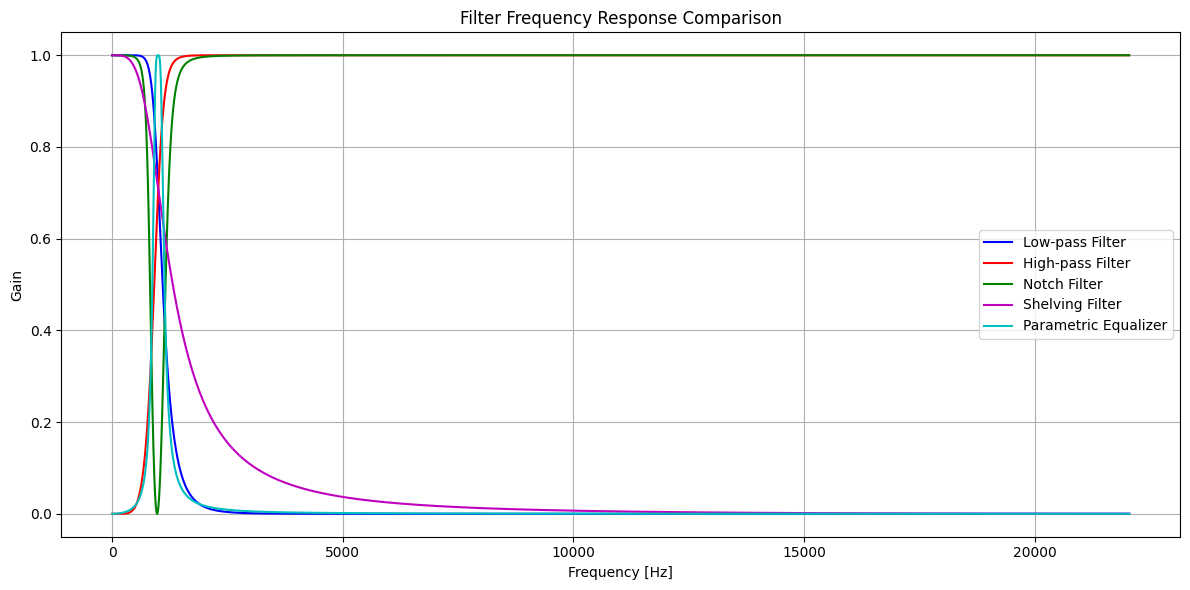

In [31]:
# Compare the frequency response of the low-pass, high-pass, notch, shelving, and parametric equalizer filters
def plot_comparison_frequency_response():
    plt.figure(figsize=(12, 6))
    
    # Low-pass filter
    b_lp, a_lp = butter_lowpass(1000.0, sample_rate, order=6)
    w_lp, h_lp = freqz(b_lp, a_lp, worN=8000)
    plt.plot(0.5 * sample_rate * w_lp / np.pi, np.abs(h_lp), 'b', label='Low-pass Filter')
    
    # High-pass filter
    b_hp, a_hp = butter_highpass(1000.0, sample_rate, order=6)
    w_hp, h_hp = freqz(b_hp, a_hp, worN=8000)
    plt.plot(0.5 * sample_rate * w_hp / np.pi, np.abs(h_hp), 'r', label='High-pass Filter')
    
    # Notch filter
    b_notch, a_notch = butter_notch(1000.0, sample_rate, Q=30.0)
    w_notch, h_notch = freqz(b_notch, a_notch, worN=8000)
    plt.plot(0.5 * sample_rate * w_notch / np.pi, np.abs(h_notch), 'g', label='Notch Filter')
    
    # Shelving filter (reuse shelving filter design)
    b_shelving, a_shelving = butter_shelving(1000.0, sample_rate, Q=30.0)
    w_shelving, h_shelving = freqz(b_shelving, a_shelving, worN=8000)
    plt.plot(0.5 * sample_rate * w_shelving / np.pi, np.abs(h_shelving), 'm', label='Shelving Filter')
    
    # Parametric equalizer
    b_peq, a_peq = design_parametric_eq(sample_rate, 1000.0, 200.0, gain=3.0)
    w_peq, h_peq = freqz(b_peq, a_peq, worN=8000)
    plt.plot(0.5 * sample_rate * w_peq / np.pi, np.abs(h_peq), 'c', label='Parametric Equalizer')
    
    # Plot settings
    plt.title("Filter Frequency Response Comparison")
    plt.xlabel("Frequency [Hz]")
    plt.ylabel("Gain")
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()

# Call the function to plot the comparison of frequency responses
plot_comparison_frequency_response()

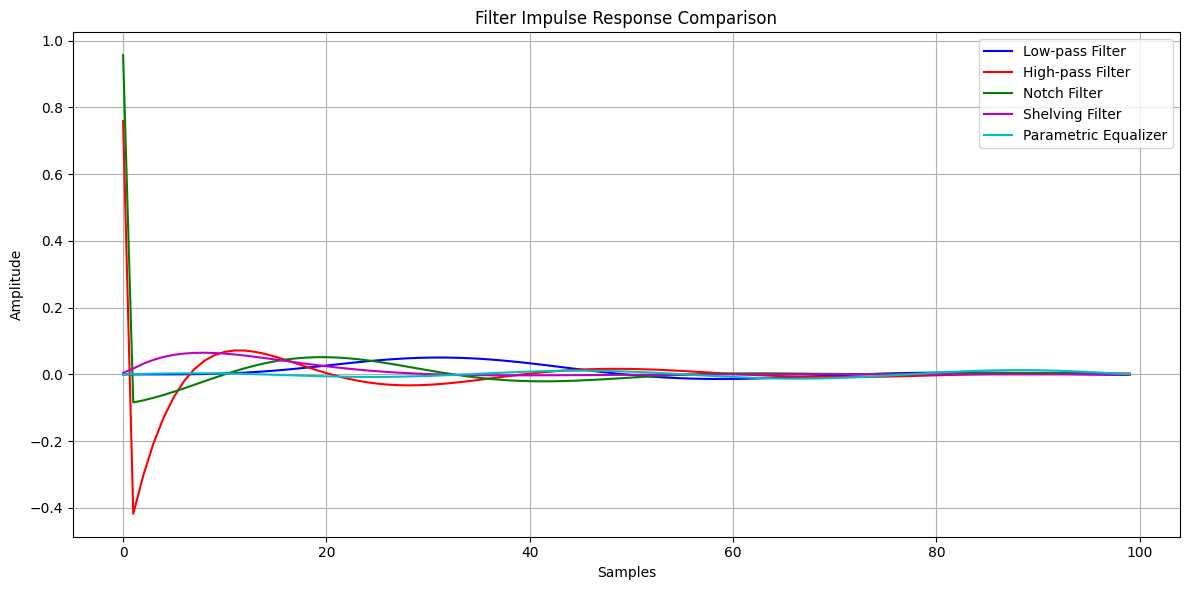

In [32]:
# Compare the impulse response of the low-pass, high-pass, notch, shelving, and parametric equalizer filters    
def plot_comparison_impulse_response():
    plt.figure(figsize=(12, 6))
    
    # Low-pass filter
    b_lp, a_lp = butter_lowpass(1000.0, sample_rate, order=6)
    impulse = np.zeros(100)
    impulse[0] = 1
    response_lp = lfilter(b_lp, a_lp, impulse)
    plt.plot(response_lp, 'b', label='Low-pass Filter')
    
    # High-pass filter
    b_hp, a_hp = butter_highpass(1000.0, sample_rate, order=6)
    response_hp = lfilter(b_hp, a_hp, impulse)
    plt.plot(response_hp, 'r', label='High-pass Filter')
    
    # Notch filter
    b_notch, a_notch = butter_notch(1000.0, sample_rate, Q=30.0)
    response_notch = lfilter(b_notch, a_notch, impulse)
    plt.plot(response_notch, 'g', label='Notch Filter')
    
    # Shelving filter (reuse shelving filter design)
    b_shelving, a_shelving = butter_shelving(1000.0, sample_rate, Q=30.0)
    response_shelving = lfilter(b_shelving, a_shelving, impulse)
    plt.plot(response_shelving, 'm', label='Shelving Filter')
    # Parametric equalizer
    b_peq, a_peq = design_parametric_eq(sample_rate, 1000.0, 200.0, gain=3.0)
    response_peq = lfilter(b_peq, a_peq, impulse)
    plt.plot(response_peq, 'c', label='Parametric Equalizer')
    # Plot settings
    plt.title("Filter Impulse Response Comparison")
    plt.xlabel("Samples")
    plt.ylabel("Amplitude")     
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()
# Call the function to plot the comparison of impulse responses
plot_comparison_impulse_response()

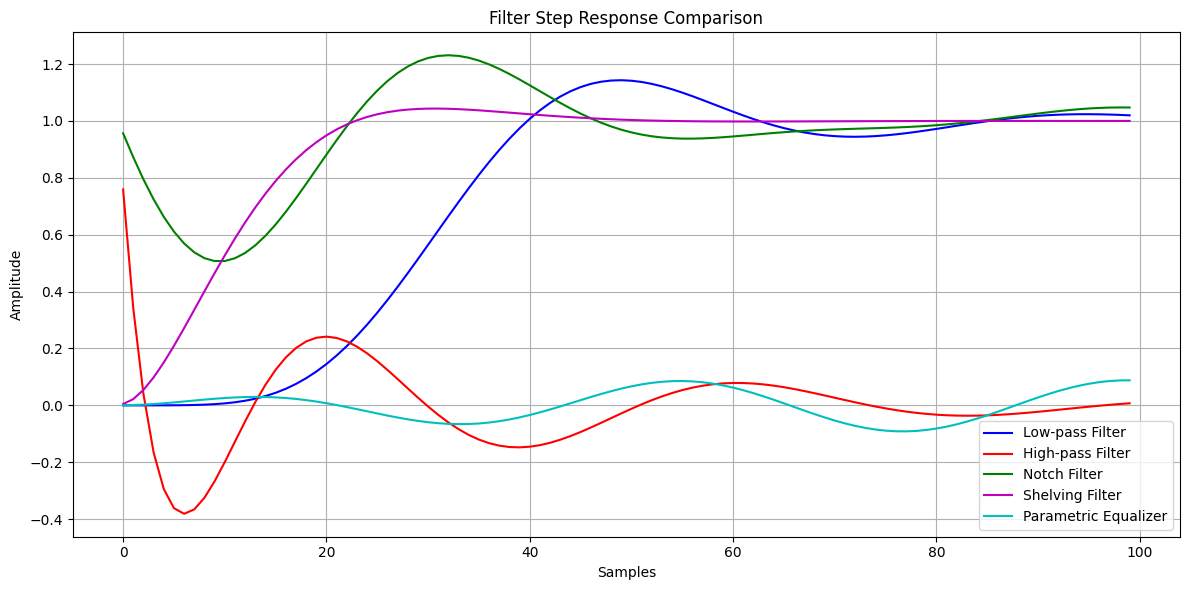

In [33]:
# Compare the step response of the low-pass, high-pass, notch, shelving, and parametric equalizer filters
def plot_comparison_step_response():
    plt.figure(figsize=(12, 6))
    
    # Low-pass filter
    b_lp, a_lp = butter_lowpass(1000.0, sample_rate, order=6)
    step = np.ones(100)
    response_lp = lfilter(b_lp, a_lp, step)
    plt.plot(response_lp, 'b', label='Low-pass Filter')
    
    # High-pass filter
    b_hp, a_hp = butter_highpass(1000.0, sample_rate, order=6)
    response_hp = lfilter(b_hp, a_hp, step)
    plt.plot(response_hp, 'r', label='High-pass Filter')
    
    # Notch filter
    b_notch, a_notch = butter_notch(1000.0, sample_rate, Q=30.0)
    response_notch = lfilter(b_notch, a_notch, step)
    plt.plot(response_notch, 'g', label='Notch Filter')
    
    # Shelving filter (reuse shelving filter design)
    b_shelving, a_shelving = butter_shelving(1000.0, sample_rate, Q=30.0)
    response_shelving = lfilter(b_shelving, a_shelving, step)
    plt.plot(response_shelving, 'm', label='Shelving Filter')
    
    # Parametric equalizer
    b_peq, a_peq = design_parametric_eq(sample_rate, 1000.0, 200.0, gain=3.0)
    response_peq = lfilter(b_peq, a_peq, step)
    plt.plot(response_peq, 'c', label='Parametric Equalizer')
    
    # Plot settings
    plt.title("Filter Step Response Comparison")
    plt.xlabel("Samples")
    plt.ylabel("Amplitude")     
    plt.legend()
    plt.grid()
    plt.tight_layout()
# Call the function to plot the comparison of step responses
plot_comparison_step_response()
# Show all plots
plt.show()
# Close all plots
plt.close('all')


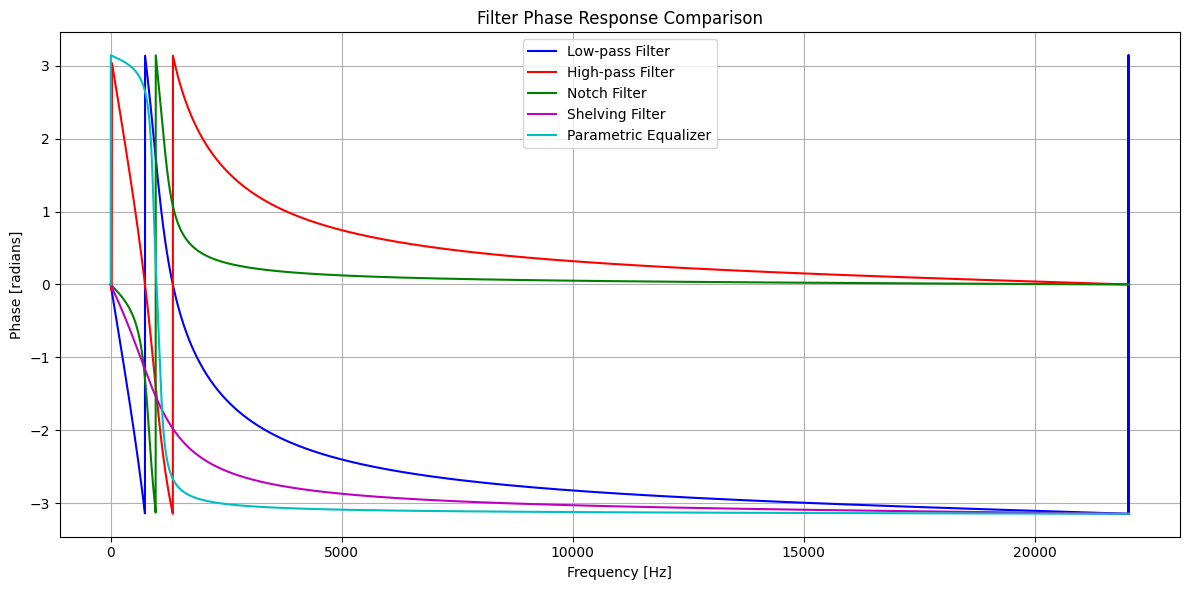

In [34]:
# Compare the phase response of the low-pass, high-pass, notch, shelving, and parametric equalizer filters
def plot_comparison_phase_response():
    plt.figure(figsize=(12, 6))
    
    # Low-pass filter
    b_lp, a_lp = butter_lowpass(1000.0, sample_rate, order=6)
    w_lp, h_lp = freqz(b_lp, a_lp, worN=8000)
    plt.plot(0.5 * sample_rate * w_lp / np.pi, np.angle(h_lp), 'b', label='Low-pass Filter')
    
    # High-pass filter
    b_hp, a_hp = butter_highpass(1000.0, sample_rate, order=6)
    w_hp, h_hp = freqz(b_hp, a_hp, worN=8000)
    plt.plot(0.5 * sample_rate * w_hp / np.pi, np.angle(h_hp), 'r', label='High-pass Filter')
    
    # Notch filter
    b_notch, a_notch = butter_notch(1000.0, sample_rate, Q=30.0)
    w_notch, h_notch = freqz(b_notch, a_notch, worN=8000)
    plt.plot(0.5 * sample_rate * w_notch / np.pi, np.angle(h_notch), 'g', label='Notch Filter')
    
    # Shelving filter (reuse shelving filter design)
    b_shelving, a_shelving = butter_shelving(1000.0, sample_rate, Q=30.0)
    w_shelving, h_shelving = freqz(b_shelving, a_shelving, worN=8000)
    plt.plot(0.5 * sample_rate * w_shelving / np.pi, np.angle(h_shelving), 'm', label='Shelving Filter')
    
    # Parametric equalizer
    b_peq, a_peq = design_parametric_eq(sample_rate, 1000.0, 200.0, gain=3.0)
    w_peq, h_peq = freqz(b_peq, a_peq, worN=8000)
    plt.plot(0.5 * sample_rate * w_peq / np.pi, np.angle(h_peq), 'c', label='Parametric Equalizer')
    
    # Plot settings
    plt.title("Filter Phase Response Comparison")
    plt.xlabel("Frequency [Hz]")
    plt.ylabel("Phase [radians]")
    plt.legend()
    plt.grid()
    plt.tight_layout()
# Call the function to plot the comparison of phase responses
plot_comparison_phase_response()
# Show all plots
plt.show()  
# Close all plots
plt.close('all')

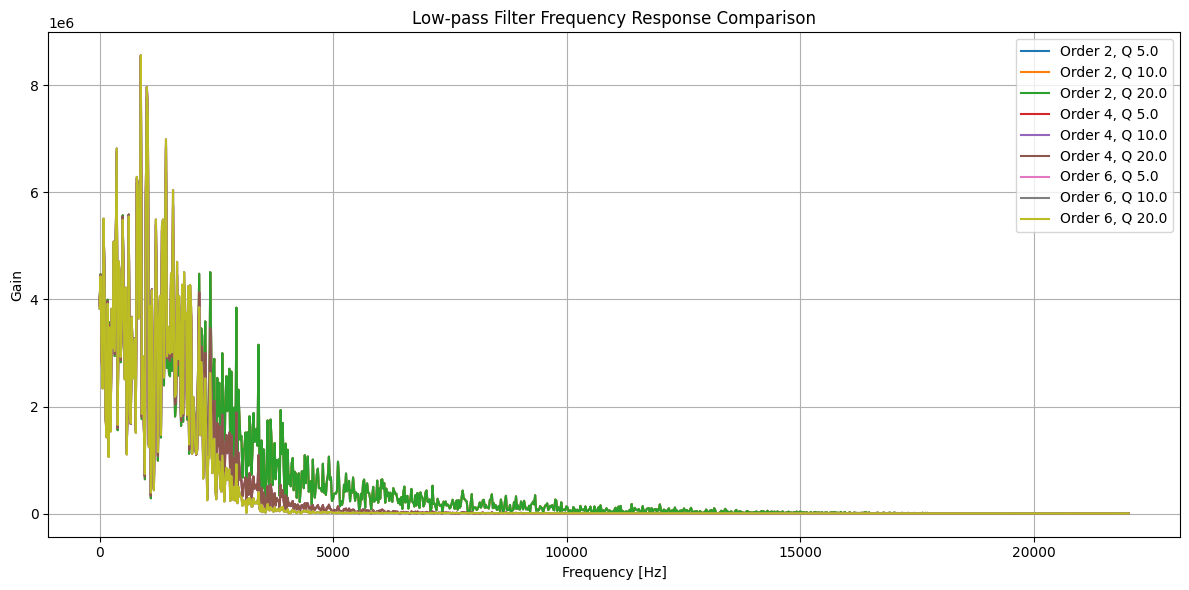

In [46]:
# Apply the low-pass filter to the broadband noise with 3 different filter orders and 3 differnt Q factors, then plot the results its frequency response
broadband_noise = broadband_noise[:44100]  # Use only 1 second of data 

def apply_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y
# Apply the low-pass filter to the broadband noise with different orders and Q factors
cutoff = 2000.0  # Desired cutoff frequency of the filter, Hz
order_list = [2, 4, 6]  # Different filter orders   
Q_list = [5.0, 10.0, 20.0]  # Different Q factors
# Create a figure for the frequency response comparison
plt.figure(figsize=(12, 6))

# Loop through different filter orders and Q factors
for order in order_list:
    for Q in Q_list:
        # Apply the low-pass filter
        filtered_broadband_noise = apply_lowpass_filter(broadband_noise, cutoff, sample_rate, order=order)
        # Compute the frequency response
        w, h = freqz(filtered_broadband_noise, worN=1024)
        # Plot the frequency response
        plt.plot(0.5 * sample_rate * w / np.pi, np.abs(h), label=f'Order {order}, Q {Q}')
# Plot settings     
plt.title("Low-pass Filter Frequency Response Comparison")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Gain")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()
# Show all plots
plt.show()
# Close all plots
plt.close('all')